# Applied machine learning in Python

**Applied machine learning in Python** was the third course in the **Applied Data Science with Python** specialization. This notebook shows my work for the four assignments that I had to solve during this course:

* **Assignment 1: Introduction to machine learning**

In this assignment I've used the Breast Cancer Wisconsin Database to create a classifier that can help diagnose patients. 
 
* ** Assignment 2:  Supervised machine learning**

This assignment was split into parts: regression and classification. In the first part I've fitted the data using Linear Regression and Lasso Regression. For the second part I've worked with the UCI Mushroom Data Set to train a model to predict whether or not a mushroom is poisonous. 

* **Assignment 3:  Evaluation**

In this assignment I have trained several models and evaluated how effectively they predict instances of fraud, using Support Vector Machines and Logistic Regression.

* **Assignment 4: Understanding and predicting property maintenance fines**

For this assignment, my task was to predict whether a given blight ticket will be paid on time. I have obtained an AUC score of 0.809 on the test dataset, using Gradient Boosted Trees.

## Assignment 1
----

For this assignment, we will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')
%matplotlib notebook


cancer = load_breast_cancer()

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.

In [2]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

### How many features does the breast cancer dataset have?

In [3]:
print(len(cancer['feature_names']))

30


### Convert the sklearn.dataset cancer to a DataFrame

In [4]:
cancerdf = pd.concat([pd.DataFrame(cancer.data), pd.DataFrame(cancer.target)], axis=1)
cancerdf.columns = np.append(cancer.feature_names,'target')

In [5]:
cancerdf.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0


### What is the class distribution? (i.e. how many instances of malignant and how many benign?)


In [6]:
print(cancerdf['target'].value_counts())

1    357
0    212
Name: target, dtype: int64


### Split the DataFrame into X (the data) and y (the labels)

In [7]:
X = cancerdf.ix[:,:-1]
y = cancerdf.ix[:,-1]

### Split X and y into training and test sets (X_train, X_test, y_train, and y_test)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

###  Fit a k-nearest neighbors (knn) classifier with X_train, y_train and using one nearest neighbor

In [9]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Predict the class label using the mean value for each feature

In [10]:
means = cancerdf.mean()[:-1].values.reshape(1, -1)
pred = knn.predict(means)

### Predict the class labels for the test set X_test.


In [11]:
preds = knn.predict(X_test)

### Accuracy of the knn classifier using `X_test` and `y_test`

In [12]:
score = knn.score(X_test, y_test)

In [13]:
print('Accuracy on the test dataset: ', score)

Accuracy on the test dataset:  0.916083916084


### Visualize the different predicition scores between training and test sets, as well as malignant and benign cells

In [ ]:
# Find the training and testing accuracies by target value (i.e. malignant, benign)
mal_train_X = X_train[y_train==0]
mal_train_y = y_train[y_train==0]
ben_train_X = X_train[y_train==1]
ben_train_y = y_train[y_train==1]

mal_test_X = X_test[y_test==0]
mal_test_y = y_test[y_test==0]
ben_test_X = X_test[y_test==1]
ben_test_y = y_test[y_test==1]

scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
          knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]


plt.figure()

# Plot the scores as a bar chart
bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

# directly label the score onto the bars
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                 ha='center', color='w', fontsize=11)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8);

## Assignment 2
----
This part of the notebook will explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. 

###  Polynomial regression
----
The code below implements a function that fits a polynomial LinearRegression model on the training data X_train for degrees 1, 3, 6, and 9. 

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

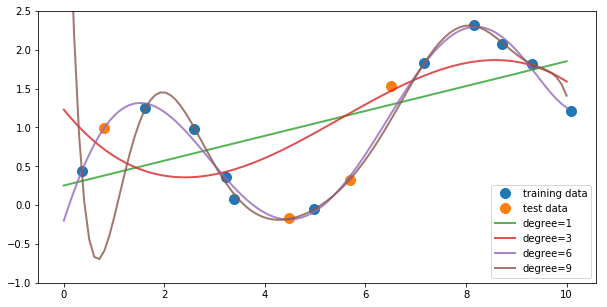

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

clf = LinearRegression()
preds = np.zeros((4, 100))
X_input = np.linspace(0, 10, 100)
powers = [1, 3, 6, 9]

for i in range(len(powers)):
    poly = PolynomialFeatures(powers[i])
    X_train_poly = poly.fit_transform(X_train[None].T)
    X_input_poly = poly.fit_transform(X_input[None].T)
    clf.fit(X_train_poly, y_train)
    preds[i,:] = clf.predict(X_input_poly)
    
plt.figure(figsize=(10,5))
plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
for i,degree in enumerate([1,3,6,9]):
    plt.plot(np.linspace(0,10,100), preds[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
plt.ylim(-1,2.5)
plt.legend(loc=4);

### Non-regularized Linear Regression model
----

In [28]:
from sklearn.metrics.regression import r2_score

poly = PolynomialFeatures(12)
lr_clf = LinearRegression()
    
X_train_poly = poly.fit_transform(X_train[None].T)
X_test_poly = poly.fit_transform(X_test[None].T)
    
lr_clf.fit(X_train_poly, y_train)
 
lr_score = r2_score(y_test, lr_clf.predict(X_test_poly))   

print('Non-regularized linear regression: ', lr_score)

Non-regularized linear regression:  -4.311965180969886


### Lasso Regression model (with parameters alpha=0.01, max_iter=10000)
----

In [29]:
from sklearn.linear_model import Lasso

lasso_clf = Lasso(alpha=0.01, max_iter=10000)
    
lasso_clf.fit(X_train_poly, y_train)
    
lasso_score = r2_score(y_test, lasso_clf.predict(X_test_poly))

print('Lasso regression score: ', lasso_score)

Lasso regression score:  0.8406625614750349


### Classification
----

For this part of the notebook, we will be working with the UCI Mushroom Data Set. The data will be used to train a model to predict whether or not a mushroom is poisonous. The following attributes are provided:
* **cap-shape**: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
* **cap-surface**: fibrous=f, grooves=g, scaly=y, smooth=s
* **cap-color**: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
* **bruises?**: bruises=t, no=f
* **odor**: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
* **gill-attachment**: attached=a, descending=d, free=f, notched=n
* **gill-spacing**: close=c, crowded=w, distant=d
* **gill-size**: broad=b, narrow=n
* **gill-color**: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
* **stalk-shape**: enlarging=e, tapering=t
* **stalk-root**: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
* **stalk-surface-above-ring**: fibrous=f, scaly=y, silky=k, smooth=s
* **stalk-surface-below-ring**: fibrous=f, scaly=y, silky=k, smooth=s
* **stalk-color-above-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
* **stalk-color-below-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
* **veil-type**: partial=p, universal=u
* **veil-color**: brown=n, orange=o, white=w, yellow=y
* **ring-number**: none=n, one=o, two=t
* **ring-type**: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
* **spore-print-color**: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
* **population**: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
* **habitat**: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

mush_df = pd.read_csv('datasets/mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

# use the following (X_train2, X_test2, y_train2, y_test2) for questions 5 through 7:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

### Decision tree classifier (default parameters)
----

In [36]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train2, y_train2)
    
idx_features = np.argsort(clf.feature_importances_)[-5:]

print('The 5 most important features: ', list(X_train2.columns[idx_features][::-1].values))

The 5 most important features:  ['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']


### Support vector machines
----

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

clf = SVC(kernel='rbf', C=1, random_state=0)
param_range = np.logspace(-4,1,6)
train_scores, test_scores = validation_curve(clf, X_test2, y_test2, 'gamma', param_range, 
                                             cv=3, scoring='accuracy', n_jobs=-1)

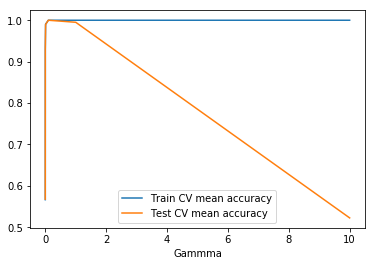

In [52]:
plt.plot(param_range, train_scores.mean(axis=1), label='Train CV mean accuracy');
plt.plot(param_range, test_scores.mean(axis=1), label='Test CV mean accuracy');
plt.xlabel('Gammma');
plt.legend();

## Assignment 3
----

In this part of the notebook, we will train several models and evaluate how effectively they predict instances of fraud.

In [66]:
import numpy as np
import pandas as pd

# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('datasets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### What percentage of the observations in the dataset are instances of fraud?
---

In [67]:
print('Percentage of fraud: %.2f%%' %(100*df.Class.value_counts()[1]/df.shape[0]))

Percentage of fraud: 1.64%


### What is the accuracy of a dummy classifier? What is the recall?
----

In [68]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score
    
clf = DummyClassifier(strategy='most_frequent')
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
recall = recall_score(y_test, clf.predict(X_test))

print('Accuracy dummy classifier: ', accuracy)
print('Recall dummy classifier: ', recall)

Accuracy dummy classifier:  0.9852507374631269
Recall dummy classifier:  0.0


### What is the accuracy, recall, and precision of a Support Vector Machines classifier (SVC)?
----

In [70]:
from sklearn.metrics import recall_score, precision_score
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
recall = recall_score(y_test, clf.predict(X_test))
precision = precision_score(y_test, clf.predict(X_test))

print('Precision SVC classifier: ', precision)
print('Recall SVC classifier: ', recall)
print('Accuracy SVC classifier: ', accuracy)

Precision SVC classifier:  1.0
Recall SVC classifier:  0.375
Accuracy SVC classifier:  0.9907817109144543


### What is the confusion matrix when using a threshold of -220 on the decision function?
----

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf = SVC(C=1e9, gamma=1e-7)
clf.fit(X_train, y_train)
preds = clf.decision_function(X_test)
preds[preds>=-220] = 1 
preds[preds<-220] = 0
conf = confusion_matrix(y_test, preds) 

print('Confusion matrix: \n', conf)

Confusion matrix: 
 [[5320   24]
 [  14   66]]


### Train a logistic regression classifier
----

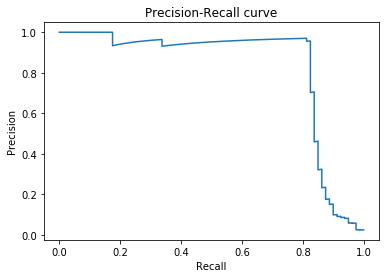

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
probs = lr_clf.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, probs)

plt.plot(recall, precision);
plt.title('Precision-Recall curve')
plt.xlabel('Recall');
plt.ylabel('Precision');

### Grid search with a Logistic Regression classifier
----

In [77]:
def get_scores():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    
    lr_clf = LogisticRegression()
    params = {'penalty': ['l1', 'l2'],
              'C': [0.01, 0.1, 1, 10, 100]}
    grid = GridSearchCV(lr_clf, params, scoring='recall', cv=3)
    grid.fit(X_train, y_train)
    cv_results = grid.cv_results_
    return cv_results['mean_test_score'].reshape((5,2))

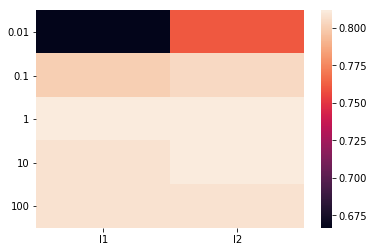

In [78]:
import seaborn as sns

def GridSearch_Heatmap(scores):
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(get_scores())

## Assignment 4
----

This assignment is based on a data challenge from the Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)). 

The Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)) and the Michigan Student Symposium for Interdisciplinary Statistical Sciences ([MSSISS](https://sites.lsa.umich.edu/mssiss/)) have partnered with the City of Detroit to help solve one of the most pressing problems facing Detroit - blight. [Blight violations](http://www.detroitmi.gov/How-Do-I/Report/Blight-Complaint-FAQs) are issued by the city to individuals who allow their properties to remain in a deteriorated condition. Every year, the city of Detroit issues millions of dollars in fines to residents and every year, many of these fines remain unpaid. Enforcing unpaid blight fines is a costly and tedious process, so the city wants to know: how can we increase blight ticket compliance?

The first step in answering this question is understanding when and why a resident might fail to comply with a blight ticket. This is where predictive modeling comes in. For this assignment, our task is to predict whether a given blight ticket will be paid on time.

All data for this assignment has been provided to through the [Detroit Open Data Portal](https://data.detroitmi.gov/).

We will use the following files for training and validating our models: train.csv and test.csv. Each row in these two files corresponds to a single blight ticket, and includes information about when, why, and to whom each ticket was issued. The target variable is compliance, which is True if the ticket was paid early, on time, or within one month of the hearing data, False if the ticket was paid after the hearing date or not at all, and Null if the violator was found not responsible. Compliance, as well as a handful of other variables that will not be available at test-time, are only included in train.csv.

Note: All tickets where the violators were found not responsible are not considered during evaluation. They are included in the training set as an additional source of data for visualization, and to enable unsupervised and semi-supervised approaches. However, they are not included in the test set.

### Data fields
---

** train.csv & test.csv **

    ticket_id - unique identifier for tickets
    agency_name - Agency that issued the ticket
    inspector_name - Name of inspector that issued the ticket
    violator_name - Name of the person/organization that the ticket was issued to
    violation_street_number, violation_street_name, violation_zip_code - Address where the violation occurred
    mailing_address_str_number, mailing_address_str_name, city, state, zip_code, non_us_str_code, country - Mailing address of the violator
    ticket_issued_date - Date and time the ticket was issued
    hearing_date - Date and time the violator's hearing was scheduled
    violation_code, violation_description - Type of violation
    disposition - Judgment and judgement type
    fine_amount - Violation fine amount, excluding fees
    admin_fee - $20 fee assigned to responsible judgments
state_fee - $10 fee assigned to responsible judgments
    late_fee - 10% fee assigned to responsible judgments
    discount_amount - discount applied, if any
    clean_up_cost - DPW clean-up or graffiti removal cost
    judgment_amount - Sum of all fines and fees
    grafitti_status - Flag for graffiti violations
    
** train.csv only **

    payment_amount - Amount paid, if any
    payment_date - Date payment was made, if it was received
    payment_status - Current payment status as of Feb 1 2017
    balance_due - Fines and fees still owed
    collection_status - Flag for payments in collections
    compliance [target variable for prediction] 
     Null = Not responsible
     0 = Responsible, non-compliant
     1 = Responsible, compliant
    compliance_detail - More information on why each ticket was marked compliant or non-compliant



In [79]:
import pandas as pd
import numpy as np

def blight_model():
    
    train_data = pd.read_csv('datasets/train.csv', encoding='latin-1')
    test_data = pd.read_csv('datasets/test.csv')
    addresses = pd.read_csv('datasets/addresses.csv')
    latlons = pd.read_csv('datasets/latlons.csv')
    addresses = addresses.merge(latlons, how='left', on='address')
    addresses.drop(['address'], axis=1, inplace=True)
    train_data = train_data.merge(addresses, on='ticket_id', how='left')
    train_data = train_data[~train_data.compliance.isnull()]
    test_data = test_data.merge(addresses, on='ticket_id', how='left')
    features = ['agency_name', 'state', 'country', 'violation_code', 'disposition',
                'fine_amount', 'admin_fee', 'state_fee', 'late_fee', 'discount_amount', 
                'clean_up_cost', 'judgment_amount', 'grafitti_status', 'lat', 'lon']
    X_train = train_data[features]
    y_train = train_data['compliance']
    X_test = test_data[features]

    X_merged = pd.concat([X_train, X_test], axis=0)
    X_merged = pd.get_dummies(X_merged).reset_index(drop=True)

    X_train = X_merged.ix[0:X_train.shape[0]-1,:]
    X_test = X_merged.ix[X_train.shape[0]:,:]

    # Impute missing data
    from sklearn.preprocessing import Imputer
    imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
    imp.fit(X_train)
    X_train = imp.transform(X_train)
    X_test = imp.transform(X_test)

    from sklearn.ensemble import GradientBoostingClassifier

    clf = GradientBoostingClassifier(n_estimators=100)
    clf.fit(X_train, y_train)

    preds = pd.Series(clf.predict_proba(X_test)[:,1])
    preds.index = test_data['ticket_id']
    
    return preds

In [80]:
preds = blight_model()